# Quantum Phase Estimation (QPE) for H₂ — **Noiseless** (Pure Package Client)

This notebook runs **QPE energy estimation** for **H₂** using only the packaged API.

Workflow:
- Run a single noiseless QPE solve (cached)
- Plot the measured phase/energy distribution
- Sweep the number of ancilla qubits (cached per setting)

In [1]:
from qpe.core import run_qpe
from qpe.io_utils import ensure_dirs
from qpe.visualize import plot_qpe_distribution, plot_qpe_sweep
from qpe.hamiltonian import build_hamiltonian

ensure_dirs()

In [2]:
molecule_name = "H2"
seed = 0

n_ancilla = 4
t_evol = 1.0
trotter_steps = 2
shots = 1000
noise_params = None  # noiseless

In [3]:
H, n_qubits, hf_state, *_, = build_hamiltonian(molecule_name)

result = run_qpe(
    hamiltonian=H,
    hf_state=hf_state,
    n_ancilla=int(n_ancilla),
    t=float(t_evol),
    seed=int(seed),
    trotter_steps=int(trotter_steps),
    noise_params=noise_params,
    shots=int(shots) if shots is not None else None,
    system_qubits=int(n_qubits),
    molecule_name=molecule_name,
    force=False,
)


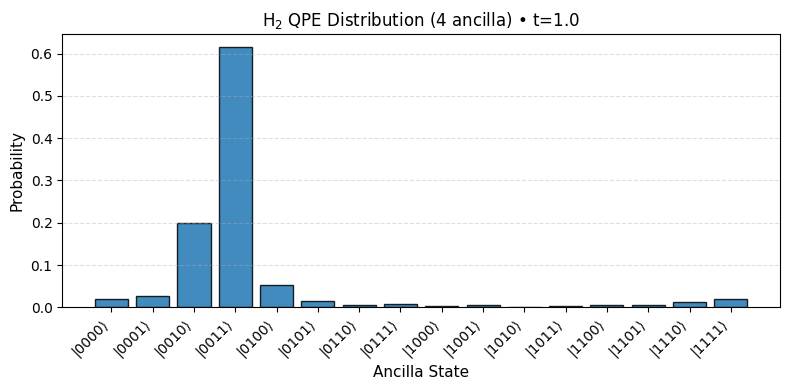

📁 Saved plot → /workspaces/Variational_Quantum_Eigensolver/images/qpe/H2/distribution_4ancilla_t1.png
Most probable bitstring: 0011
Estimated phase: 0.187500
Estimated energy: -1.17809725 Ha
Hartree–Fock energy: -1.11668439 Ha
ΔE (QPE - HF): -0.06141286 Ha


In [4]:
plot_qpe_distribution(result, show=True, save=True)

print(f"Most probable bitstring: {result['best_bitstring']}")
print(f"Estimated phase: {result['phase']:.6f}")
print(f"Estimated energy: {result['energy']:.8f} Ha")
print(f"Hartree–Fock energy: {result['hf_energy']:.8f} Ha")
print(f"ΔE (QPE - HF): {result['energy'] - result['hf_energy']:+.8f} Ha")

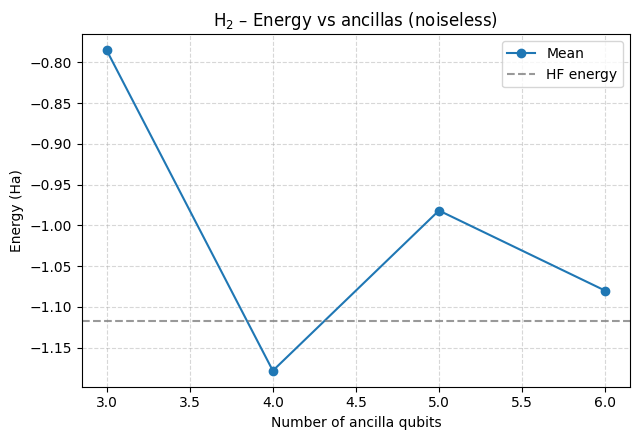

📁 Saved plot → /workspaces/Variational_Quantum_Eigensolver/images/qpe/H2/sweep_energy_vs_ancillas_noiseless.png


In [5]:
# Sweep over number of ancilla qubits (noiseless)
anc_list = [3, 4, 5, 6]
energies = []

for n in anc_list:
    r = run_qpe(
        hamiltonian=H,
        hf_state=hf_state,
        n_ancilla=int(n),
        t=float(t_evol),
        seed=int(seed),
        trotter_steps=int(trotter_steps),
        noise_params=noise_params,
        shots=int(shots) if shots is not None else None,
        system_qubits=int(n_qubits),
        molecule_name=molecule_name,
        force=False,
    )
    energies.append(float(r["energy"]))

plot_qpe_sweep(
    anc_list,
    energies,
    molecule=molecule_name,
    sweep_label="Number of ancilla qubits",
    ylabel="Energy (Ha)",
    title="Energy vs ancillas (noiseless)",
    ref_value=result["hf_energy"],
    ref_label="HF energy",
    ancilla=None,
    noise_params=None,
    seed=int(seed),
    show=True,
    save=True,
)